## CRISP-DM Phase 4. Modelling

In [1]:
# Dependencies
import sys
sys.path.append('../src')
import utils
import data_processor
import cross_validator
import deeplearning_build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load processed data
processed_data: pd.DataFrame = utils.load_preprocessed_data()

# Data preprocessing object
processor = data_processor.DataProcessor(processed_data)
X, y = processor.create_feature_matrix_and_target_vector(target_column="price actual")

# Target variable should be the last column (for compatibility with deeplearning_build module)
processed_data = processed_data.drop(columns=["price actual"])
processed_data["price actual"] = y

# Split data into train, validation and test sets (80%, 20%)
df_train, _ = train_test_split(processed_data, test_size=0.2, random_state=0, shuffle=False)

In [ ]:
# List of models to test
models_to_test = ["LSTM", "GRU", "BiLSTM", "CNN-LSTM", "CNN-GRU", "CNN-BiLSTM", "CNN-BiLSTM-Attention", "TCN"]

# Perform cross-validation and evaluate models

mae_list = []
mse_list = []
rmse_list = []
r2_list = []

for model_name in models_to_test:
    
    print(f"Training and evaluating {model_name}...")
    
    # Initialize the TimeSeriesCrossValidator with the deepL model
    tscv = cross_validator.TimeSeriesCrossValidator(model_name, df_train, n_splits=5)
    
    mae_scores, mse_scores, rmse_scores, r2_scores = tscv.validate()
    
    mae_list.append(mae_scores)
    mse_list.append(mse_scores)
    rmse_list.append(rmse_scores)
    r2_list.append(r2_scores)

# Evaluation dataframe
eval_df = pd.DataFrame({"Model": models_to_test, "MAE": mae_list, "MSE": mse_list, "RMSE": rmse_list, "R2": r2_list})
eval_df

C:\Users\Andre\AppData\Local\Temp\ipykernel_12408\1538110548.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(eval_df['Model'], rotation=45, ha='right')


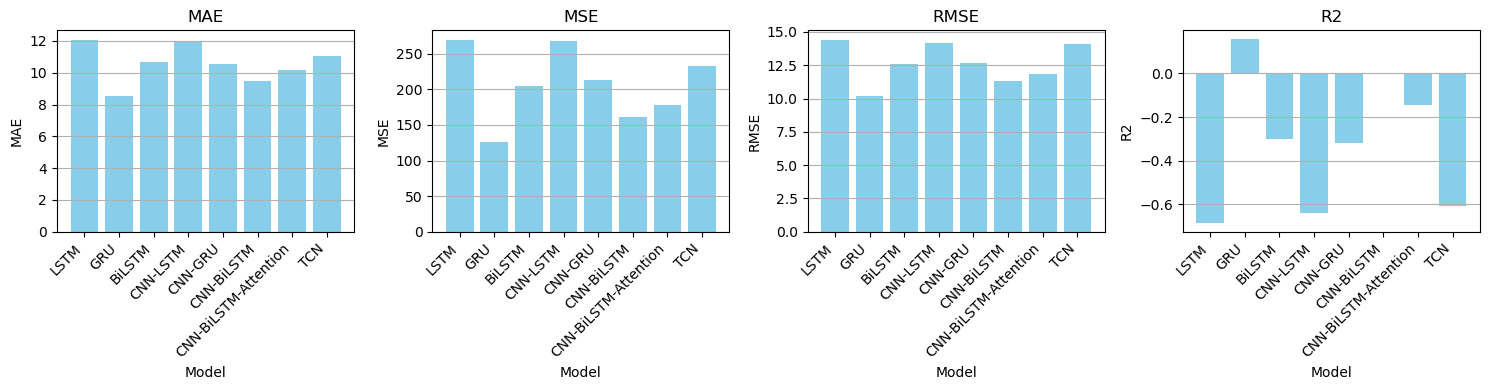

In [ ]:
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 4))

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(eval_df['Model'], eval_df[metric].apply(lambda x: np.mean(x)), color='skyblue')
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_xticklabels(eval_df['Model'], rotation=45, ha='right')
    ax.yaxis.grid()

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Save the plot
plt.savefig('../plots/metrics_mean.png')

# Show the plot
plt.show()

C:\Users\Andre\AppData\Local\Temp\ipykernel_12408\1442704344.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(eval_df['Model'], rotation=45, ha='right')


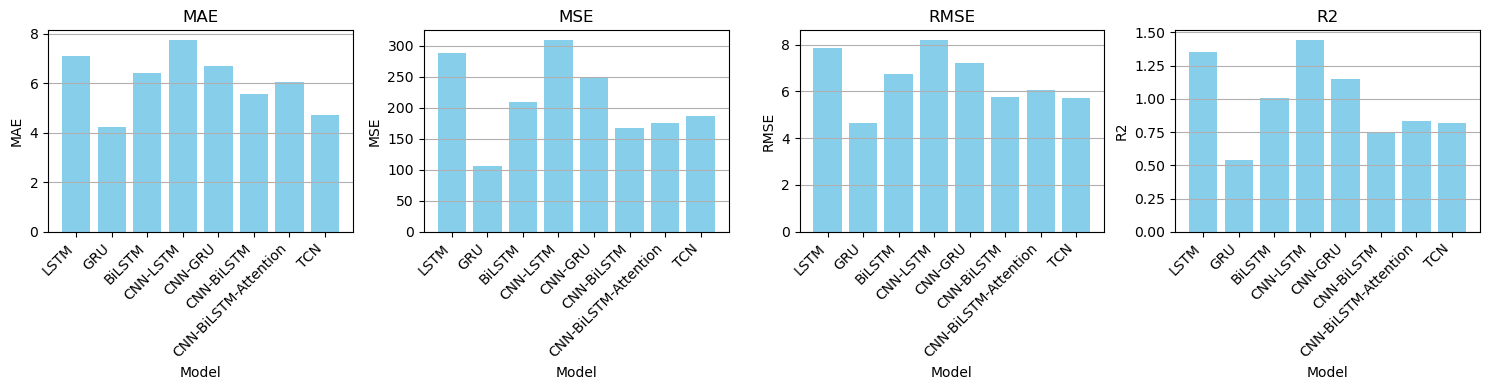

In [ ]:
# plot standard deviation of each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 4))

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(eval_df['Model'], eval_df[metric].apply(lambda x: np.std(x)), color='skyblue')
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_xticklabels(eval_df['Model'], rotation=45, ha='right')
    ax.yaxis.grid()

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Save the plot
plt.savefig('../plots/metrics_std.png')

# Show the plot
plt.show()

### Best Model Selection

- LSTM and hybrid CNN-LSTM have the highest values of MAE, MSE and RMSE. However LSTM has a slightly lower standard deviation, so LSTM is selected to proced to evaluation on test set. Note: Very few epochs were set to train the models, to save time, so the results may be very different if a larger number of epochs is explored.